<a href="https://colab.research.google.com/github/jhasweta989/character-recognition/blob/main/Plate_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import cv2
import os
import glob

In [ ]:
IMAGE_SIZE = 200

In [ ]:
img_dir = "/content/drive/MyDrive/Licence_Plate_Detection/images" # Enter Directory of all images 
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
files.sort() #We sort the images in alphabetical order to match them to the xml files containing the annotations of the bounding boxes

In [ ]:
X=[]

In [ ]:
with tf.device('/GPU:0'):
  for f1 in files:
      img = cv2.imread(f1)
      img = cv2.resize(img, (IMAGE_SIZE,IMAGE_SIZE))
      X.append(np.array(img))

In [ ]:
len(files)

433

In [ ]:
len(X)

433

In [ ]:
from lxml import etree

In [ ]:
def resizeannotation(f):
    tree = etree.parse(f)
    for dim in tree.xpath("size"):
        width = int(dim.xpath("width")[0].text)
        height = int(dim.xpath("height")[0].text)
    for dim in tree.xpath("object/bndbox"):
        xmin = int(dim.xpath("xmin")[0].text)/(width/IMAGE_SIZE)
        ymin = int(dim.xpath("ymin")[0].text)/(height/IMAGE_SIZE)
        xmax = int(dim.xpath("xmax")[0].text)/(width/IMAGE_SIZE)
        ymax = int(dim.xpath("ymax")[0].text)/(height/IMAGE_SIZE)
    return [int(xmax), int(ymax), int(xmin), int(ymin)]

In [ ]:
path = '/content/drive/MyDrive/Licence_Plate_Detection/annotations'

In [ ]:
text_files = ['/content/drive/MyDrive/Licence_Plate_Detection/annotations/'+f for f in sorted(os.listdir(path))]

In [ ]:
text_files

['/content/drive/MyDrive/Licence_Plate_Detection/annotations/Cars0.xml',
 '/content/drive/MyDrive/Licence_Plate_Detection/annotations/Cars1.xml',
 '/content/drive/MyDrive/Licence_Plate_Detection/annotations/Cars10.xml',
 '/content/drive/MyDrive/Licence_Plate_Detection/annotations/Cars100.xml',
 '/content/drive/MyDrive/Licence_Plate_Detection/annotations/Cars101.xml',
 '/content/drive/MyDrive/Licence_Plate_Detection/annotations/Cars102.xml',
 '/content/drive/MyDrive/Licence_Plate_Detection/annotations/Cars103.xml',
 '/content/drive/MyDrive/Licence_Plate_Detection/annotations/Cars104.xml',
 '/content/drive/MyDrive/Licence_Plate_Detection/annotations/Cars105.xml',
 '/content/drive/MyDrive/Licence_Plate_Detection/annotations/Cars106.xml',
 '/content/drive/MyDrive/Licence_Plate_Detection/annotations/Cars107.xml',
 '/content/drive/MyDrive/Licence_Plate_Detection/annotations/Cars108.xml',
 '/content/drive/MyDrive/Licence_Plate_Detection/annotations/Cars109.xml',
 '/content/drive/MyDrive/Licen

In [ ]:
y=[]

In [ ]:
with tf.device('/GPU:0'):
  for i in text_files:
      y.append(resizeannotation(i))


In [ ]:
X=np.array(X)
y=np.array(y)

In [ ]:
X= X/255
y=y/255

In [ ]:
X.shape

(433, 200, 200, 3)

In [ ]:
y.shape

(433, 4)

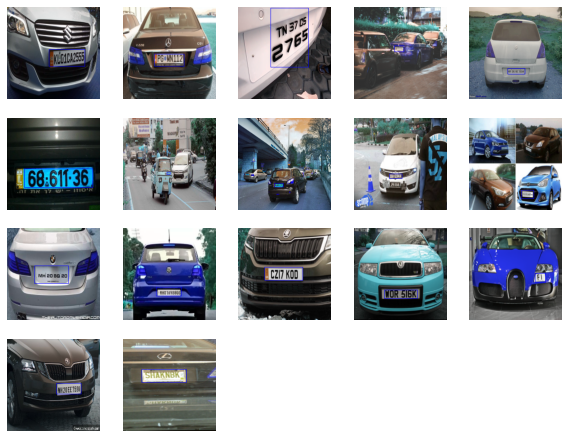

In [ ]:
plt.figure(figsize=(10,20))
for i in range(0,17) :
    plt.subplot(10,5,i+1)
    plt.axis('off')
   ## plt.imshow(X[i])
    image = cv2.rectangle(X[i],(y[i][0],y[i][1]),(y[i][2],y[i][3]),(0, 0, 255))
    plt.imshow(image) 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.applications.vgg16 import VGG16

In [ ]:
# Create the model
model = Sequential()
model.add(VGG16(weights="imagenet", include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="sigmoid"))/content/drive/MyDrive/character/Testing Data

model.layers[-6].trainable = False

model.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 6, 6, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2359424   
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 260       
Total params: 17,099,140
Trainable params: 2,384,452
Non-

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [ ]:
with tf.device('/GPU:0'):
  train = model.fit(X_train, y_train, validation_split=0.1, epochs=50, batch_size=5, verbose=1)

In [ ]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 8s 2s/step - loss: 0.0065 - accuracy: 0.7955


[0.006455236580222845, 0.7954545617103577]